# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

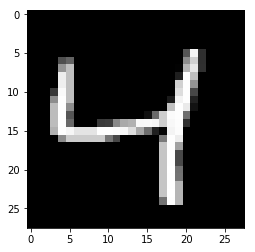

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# 数据是mnist.train.images
image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,(None,image_size), name = 'inputs')
targets_ = tf.placeholder(tf.float32,(None,image_size), name = 'targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [9]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6957
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6801
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6693
Epoch: 1/20... Training loss: 0.6615
Epoch: 1/20... Training loss: 0.6541
Epoch: 1/20... Training loss: 0.6440
Epoch: 1/20... Training loss: 0.6336
Epoch: 1/20... Training loss: 0.6229
Epoch: 1/20... Training loss: 0.6099
Epoch: 1/20... Training loss: 0.5960
Epoch: 1/20... Training loss: 0.5829
Epoch: 1/20... Training loss: 0.5641
Epoch: 1/20... Training loss: 0.5504
Epoch: 1/20... Training loss: 0.5331
Epoch: 1/20... Training loss: 0.5135
Epoch: 1/20... Training loss: 0.4980
Epoch: 1/20... Training loss: 0.4773
Epoch: 1/20... Training loss: 0.4581
Epoch: 1/20... Training loss: 0.4433
Epoch: 1/20... Training loss: 0.4288
Epoch: 1/20... Training loss: 0.4180
Epoch: 1/20... Training loss: 0.4021
Epoch: 1/20... Training loss: 0.3919
E

Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1787
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1809
Epoch: 1/20... Training loss: 0.1810
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1792
Epoch: 1/20... Training loss: 0.1815
Epoch: 1/20... Training loss: 0.1821
E

Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1474
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1496
E

Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1295
E

Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1186
E

Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1124
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1095
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1187
E

Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1128
E

Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1039
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1053
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0994
E

Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0979
E

Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0969
E

Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0900
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.1004
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0878
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0995
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0873
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0960


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

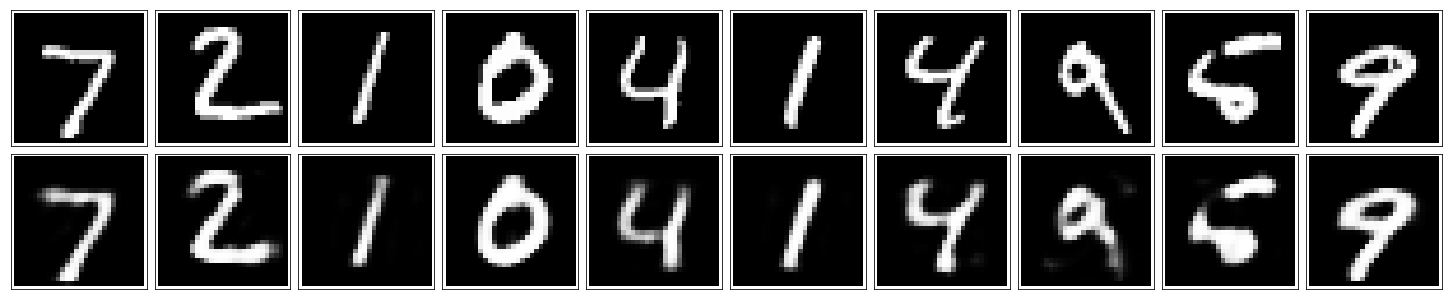

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.